In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.shape

(96, 4)

In [5]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [6]:
df.rename(columns = {'Life expectancy at birth (years)' : 'LEABY'},inplace = True)

In [7]:
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


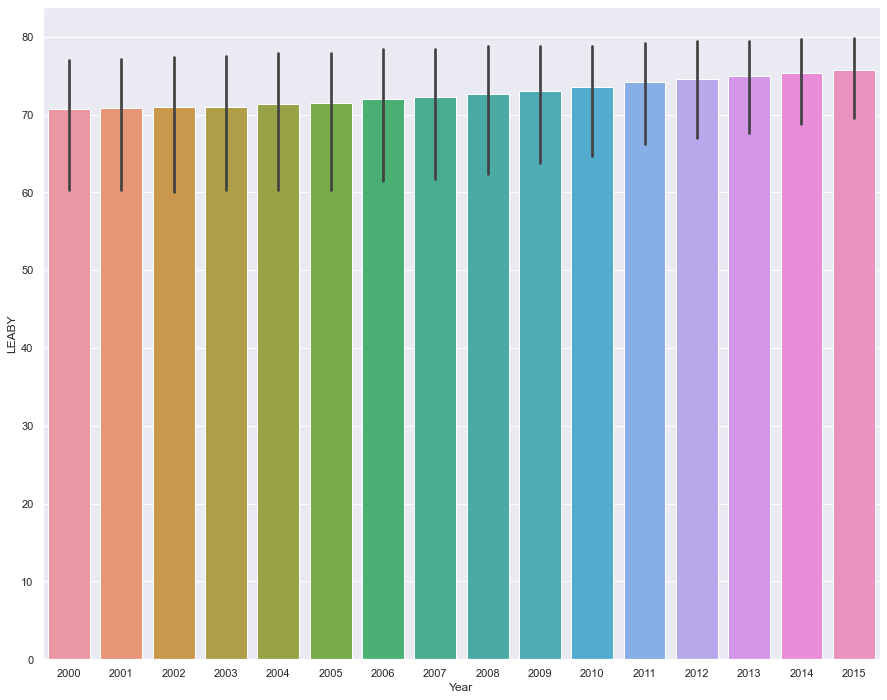

In [13]:
sns.barplot(data=df,x='Year',y='LEABY')
sns.set(rc={'figure.figsize':(10,18)})
plt.show()

From the above graph we conclude that the average years that a person lives is gradually increased.

In [9]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [10]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

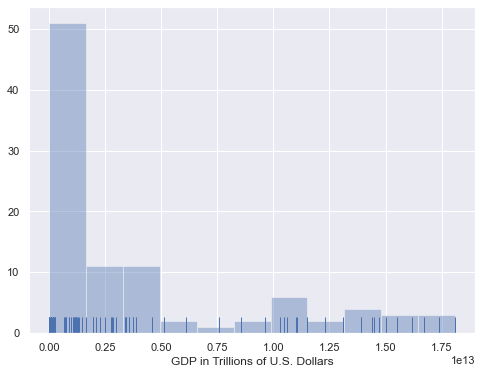

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

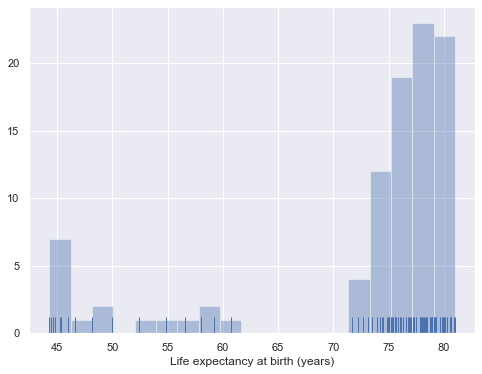

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df.LEABY, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

In [15]:
df1 = df.drop('Year',axis=1).groupby('Country').mean().reset_index()
df1

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Life Expectancy and all of the countries except for Zimbabwe have values in the mid-to-high 70s. This probably explains the skew in the distribution from before!

Text(0.5, 0, 'Life expectancy at birth (years)')

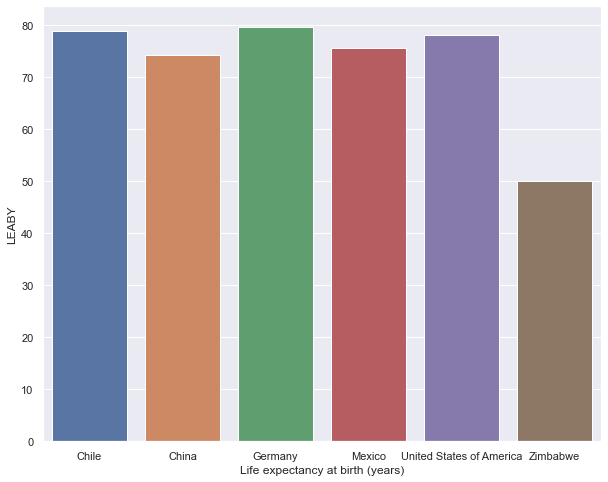

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x="Country", y="LEABY", data=df1)
plt.xlabel("Life expectancy at birth (years)")

For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

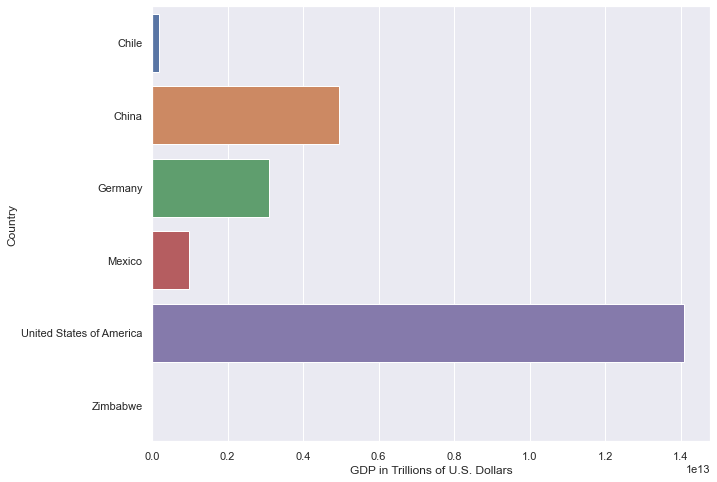

In [27]:
plt.figure(figsize=(10,8))
sns.barplot(x="GDP", y="Country", data=df1)
plt.xlabel("GDP in Trillions of U.S. Dollars");

Text(0.5, 0, 'Life expectancy at birth (years)')

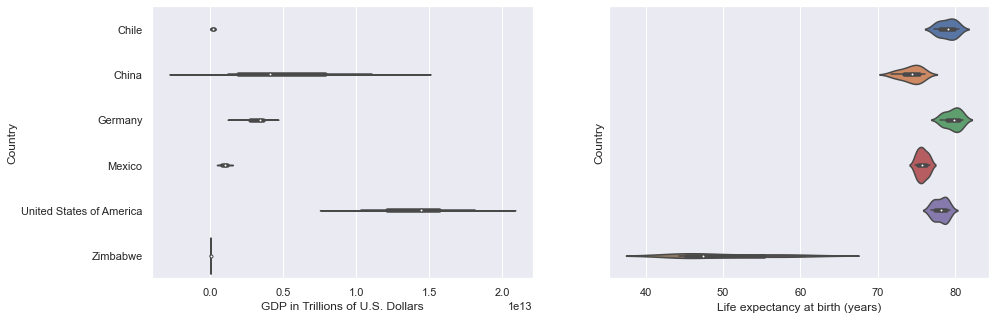

In [30]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)")

In the GDP plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges.

In the LEABY plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

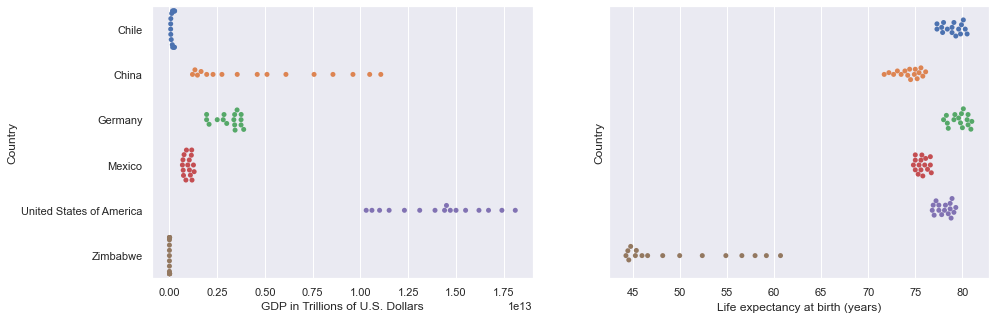

In [31]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

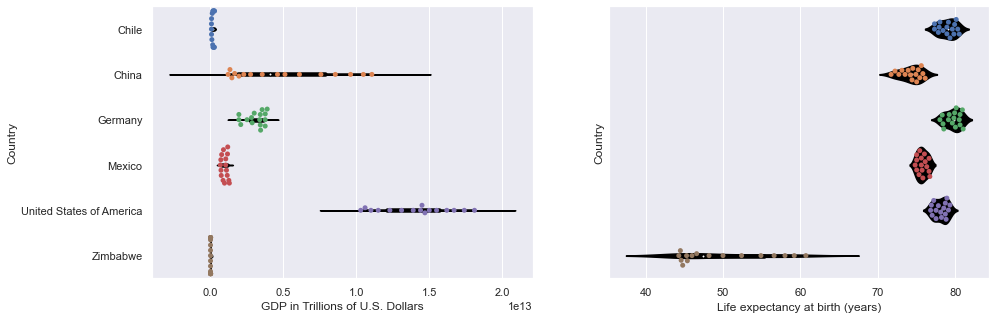

In [32]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

In the case of of the GDP plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the number of data points that fall around their values.

Next the data will explore GDP and LEABY over the years through line charts. Below the countries are separated by colors and one can see that the US and China have seen substantial gains between 2000-2015. China went from less than a quarter trillion dollars to one trillion dollars in the time span. The rest of the countries did not see increases in this magnitude.

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

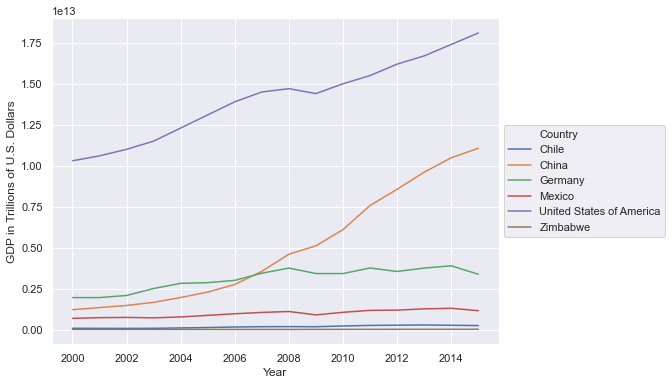

In [34]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

Another aspect that was looked more into depth was the faceted line charts by Country. In the individual plots, each country has their own y axis, which makes it easier to compare the shape of their GDP over the years without the same scale. This method makes it easier to see that all of the countries have seen increases. In the chart above, the other country's GDP growth looked modest compared to China and the US, but all of the countries did experience growth from the year 2000.

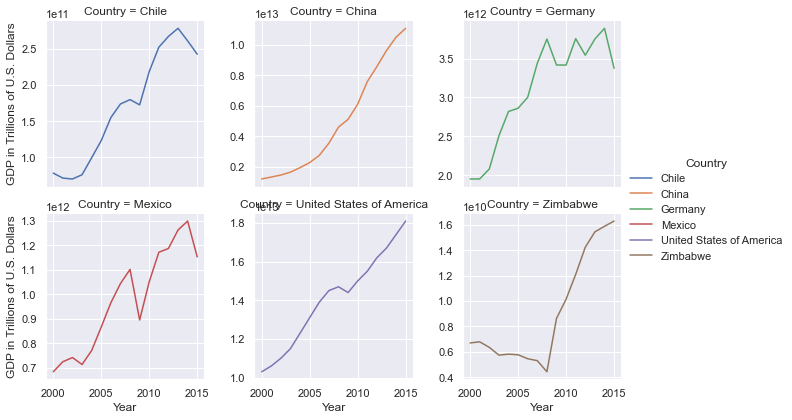

In [36]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP

The chart below shows now looks at life expectancy over the years. The chart shows that every country has been increasing their life expectancy, but Zimbabwe has seen the greatest increase after a bit of a dip around 2004.

Text(0, 0.5, 'Life expectancy at birth (years)')

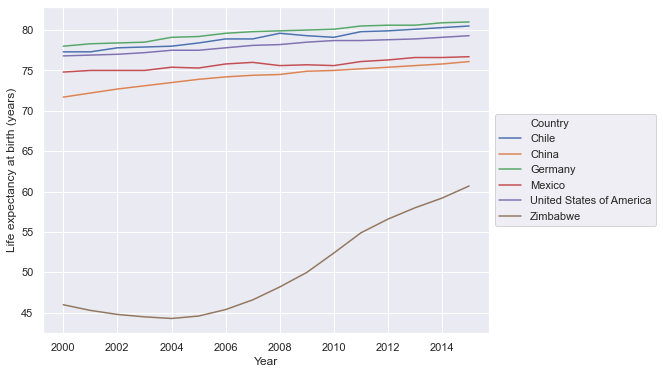

In [37]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")


Much like the break down of GDP by country before, the plot below breaks out life expectancy by country. It is apparent that Chile, and Mexico seemed to have dips in their life expectancy around the same time which could be looked into further. This type of plotting proves useful since much of these nuances were lost when the y axis was shared among the countries. Also the seemingly linear changes were in reality was not as smooth for some of the countries.

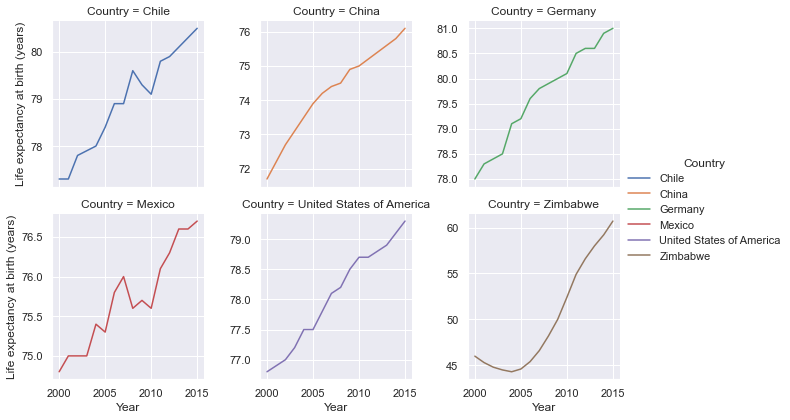

In [38]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

The next two charts will explore the relationship between GDP and LEABY. In the chart below, it looks like the previous charts where GDP for Zimbabwe is staying flat, while their life expectancy is going up. For the other countries they seem to exhibit a rise in life expectancy as GDP goes up. The US and China seem to have very similar slopes in their relationship between GDP and life expectancy.

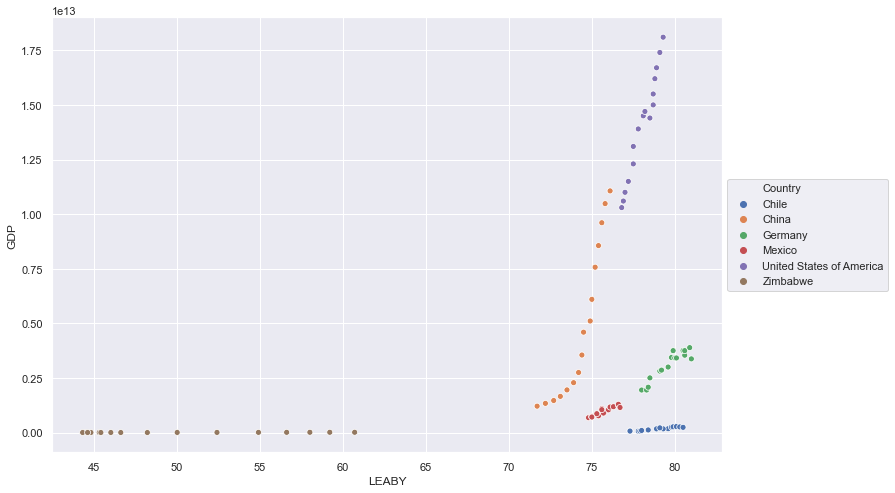

In [39]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

Like the previous plots, countries are broken out into each scatter plot by facets. Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.

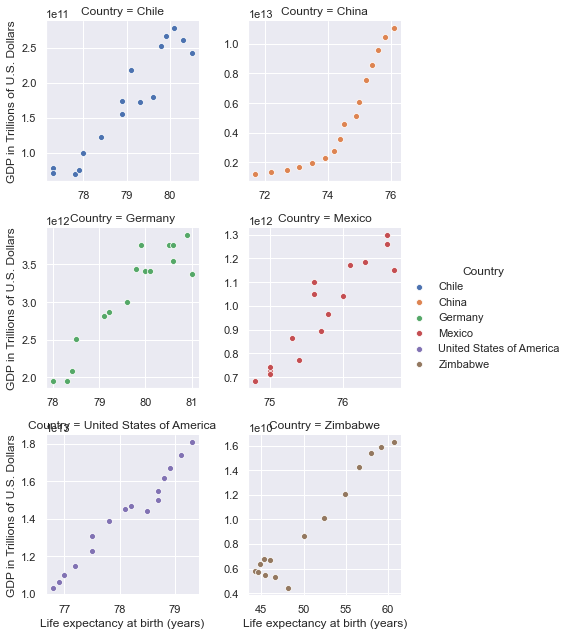

In [42]:
graph = sns.FacetGrid(df, col="Country", col_wrap=2,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns.

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    -    Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    -     GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
     -     Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
     -      Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
     -     the life expectancy had a left skew, or most of the observations were on the right side.